In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/My Drive/FaceEmotions/fer2013.csv')

In [ ]:
path='/content/drive/My Drive/FaceEmotions/fer2013.csv'

In [ ]:
emotions=['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [ ]:
def getData(filname):
    # images are 48x48
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])
            
    return X, Y

In [ ]:
X_train,Y_train=getData(path)

In [ ]:
num_class = len(set(Y_train))

In [ ]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],48,48,1)
X_train=X_train.astype('float32')
X_train=X_train/255

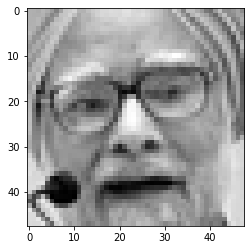

In [ ]:
plt.figure()
plt.imshow(X_train[1][:,:,0])

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization


In [ ]:
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    # UNCOMMENT THIS TO VIEW THE ARCHITECTURE
    #model.summary()
    
    return model
model=my_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization_5 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 24, 128)      

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [ ]:
path_model='facemodel.h5' # save model at this location after each epoch
K.tensorflow_backend.clear_session() # destroys the current graph and builds a new one
model=my_model() # create the model
K.set_value(model.optimizer.lr,1e-3) # set the learning rate
# fit the model
h=model.fit(x=X_train,     
            y=y_train, 
            batch_size=64, 
            epochs=20, 
            verbose=1, 
            validation_data=(X_test,y_test),
            shuffle=True,
            callbacks=[
                ModelCheckpoint(filepath=path_model),
            ]
            )

Train on 32298 samples, validate on 3589 samples
Epoch 1/20
32298/32298 [==============================] - 58s 2ms/step - loss: 1.6382 - accuracy: 0.3644 - val_loss: 1.4976 - val_accuracy: 0.4168
Epoch 2/20
32298/32298 [==============================] - 57s 2ms/step - loss: 1.2466 - accuracy: 0.5252 - val_loss: 1.4335 - val_accuracy: 0.4661
Epoch 3/20
32298/32298 [==============================] - 57s 2ms/step - loss: 1.0865 - accuracy: 0.5916 - val_loss: 1.2999 - val_accuracy: 0.4868
Epoch 4/20
32298/32298 [==============================] - 57s 2ms/step - loss: 0.9756 - accuracy: 0.6347 - val_loss: 1.1318 - val_accuracy: 0.5837
Epoch 5/20
32298/32298 [==============================] - 57s 2ms/step - loss: 0.8582 - accuracy: 0.6810 - val_loss: 1.1050 - val_accuracy: 0.5874
Epoch 6/20
32298/32298 [==============================] - 57s 2ms/step - loss: 0.7218 - accuracy: 0.7365 - val_loss: 1.1138 - val_accuracy: 0.5996
Epoch 7/20
32298/32298 [==============================] - 57s 2ms/ste

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


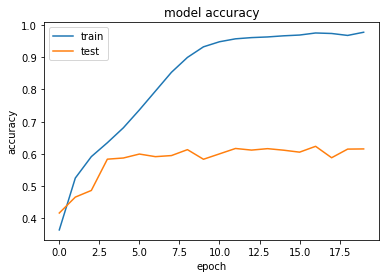

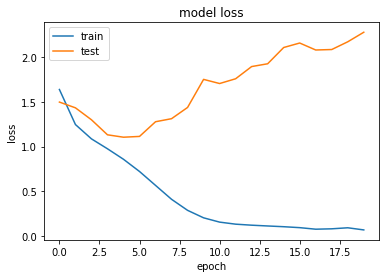

In [ ]:
print(h.history.keys())
# summarize history for accuracy
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [ ]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
plt.show()

In [ ]:
y_pred=model.predict(X_test)
#print(y_pred)
y_test.shape

(3589, 7)

In [ ]:
y_pred

array([[2.0390576e-06, 6.2512338e-09, 7.9587159e-10, ..., 1.9558492e-08,
        3.8547606e-07, 8.2457891e-06],
       [1.6614137e-02, 9.0466983e-07, 3.5055693e-02, ..., 9.1352361e-01,
        3.3850078e-02, 8.5691980e-04],
       [4.4613991e-02, 1.7213358e-08, 6.5210181e-01, ..., 1.3341789e-06,
        3.0066422e-01, 5.3312910e-05],
       ...,
       [7.4780428e-06, 2.8114066e-05, 9.5180978e-05, ..., 7.2488846e-04,
        1.1482869e-03, 9.3300688e-01],
       [4.1609008e-02, 1.0543218e-04, 6.5850699e-04, ..., 7.7917027e-01,
        1.7407170e-02, 1.6080201e-01],
       [3.4027051e-02, 1.6266089e-05, 1.1582350e-01, ..., 9.6224807e-03,
        3.9003137e-01, 8.2595885e-02]], dtype=float32)

In [ ]:
pred=[]
for i in range(y_pred.shape[0]):
  pred.append(np.argmax(y_pred[i]))


In [ ]:
model = tf.keras.models.load_model('/content/drive/My Drive/Facemodels/facemodelaug.h5')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


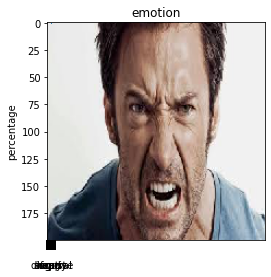

Expression Prediction: happy


In [ ]:
from skimage import io
img = image.load_img('/content/drive/My Drive/testimages/download.jfif', grayscale=True, target_size=(48, 48))
show_img=image.load_img('/content/drive/My Drive/testimages/download.jfif', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()


a=custom[0]
ind=np.argmax(a)
        
print('Expression Prediction:',objects[ind])